In [38]:
import pandas as pd
import numpy as np

In [39]:
AT = 300 
RT = 100 
TR = 60*2 
TIME_STEP = 30  

In [40]:
data_file = "gradients.csv"
df = pd.read_csv(data_file)

In [41]:
df

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km)
0,5.275000,1.0,18.555,71.472,92.23,18990.0000,-15.760639
1,5.283333,1.0,18.506,71.498,92.11,19019.9988,-19.674570
2,5.291667,1.0,18.456,71.524,92.00,19050.0012,-17.744430
3,5.300000,1.0,18.407,71.549,91.86,19080.0000,-23.128046
4,5.308333,1.0,18.358,71.574,91.76,19109.9988,-16.519140
...,...,...,...,...,...,...,...
24700,10.475000,32.0,2.055,81.249,123.39,37710.0000,0.000000
24701,10.483333,32.0,1.967,81.295,123.39,37739.9988,0.000000
24702,10.491667,32.0,1.878,81.342,123.39,37770.0012,0.000000
24703,10.500000,32.0,1.789,81.390,123.39,37800.0000,0.000000


In [42]:
required_columns = ["Time", "PRN", "Gradient (mm/km)"]
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must include the following columns: {', '.join(required_columns)}")

In [43]:
df = df.sort_values(by=["PRN", "Time"])

In [44]:
df["Alert Status"] = "Normal" 
df["Recovery Timer"] = 0  

In [45]:
filtered_df = df[(df["Time"] >= 13) & (df["Time"] <= 17)]

In [46]:
df = filtered_df

In [47]:
df.head()

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km),Alert Status,Recovery Timer
780,13.000000,1.0,11.377,81.819,64.03,46800.0000,-104.141755,Normal,0
781,13.008333,1.0,11.401,81.816,63.87,46829.9988,-59.509648,Normal,0
782,13.016667,1.0,11.425,81.813,63.64,46860.0012,-85.545227,Normal,0
783,13.025000,1.0,11.449,81.810,63.39,46890.0000,-92.984058,Normal,0
784,13.033333,1.0,11.473,81.807,63.19,46919.9988,-74.387340,Normal,0


In [48]:
prns = df["PRN"].unique()
for prn in prns:
    prn_data = df[df["PRN"] == prn].copy()
    in_alert = False
    recovery_timer = 0
    for i in range(len(prn_data)):
        current_row = prn_data.iloc[i]

        if i > 0:
            time_diff = (current_row["Time_seconds"] - prn_data.iloc[i - 1]["Time_seconds"])
            if time_diff > 90:
                prn_data.at[current_row.name, "Alert Status"] = "DataGap"
                continue

        gradient = current_row["Gradient (mm/km)"]
        if in_alert:
            if abs(gradient) < RT:
                recovery_timer += TIME_STEP
                # print(recovery_timer)
                prn_data.at[current_row.name, "Recovery Timer"] = recovery_timer
                print(prn_data.at[current_row.name, "Recovery Timer"])
                if recovery_timer >= TR:
                    in_alert = False
                    prn_data.at[current_row.name, "Alert Status"] = "Normal"
                    recovery_timer = 0
                else:
                    prn_data.at[current_row.name, "Alert Status"] = "Alert"
            else:
                recovery_timer = 0 
                prn_data.at[current_row.name, "Alert Status"] = "Alert"
        else:
            if abs(gradient) > AT:
                in_alert = True
                prn_data.at[current_row.name, "Alert Status"] = "Alert"
    df.update(prn_data)


30
30
60
90
120
30
30
30
60
30
60
90
30
60
90
30
60
30
30
60
90
120
30
30
60
90
120
30
30
30
30
30
30
60
30
60
90
30
60
90
120
30
30
30
30
30
60
90
120
30
60
90
30
30
30
60
90
30
30
30
60
90
30
60
90
120
30
30
30
30
60
30
60
90
30
30
30
60
90
120
30
60
30
60
30
30
30
60
90
120
30
60
90
120
30
60
30
60
90
30
30
60
90
30
30
30
60
90
120
30
60
30
60
90
120
30
30
30
30
60
30
30
60
90
30
30
60
90
30
30
60
90
120
30
60
90
120
30
60
90
30
60
30
60
90
30
30
60
90
30
60
30
60
30
60
90
30
60
90
120
30
60
30
30
30
30
30
60
90
30
60
30
30
60
30
30
60
90
30
30
30
30
30
60
30
60
90
120
30
60
30
30
30
60
30
30
60
90
120


In [49]:
df[df["Alert Status"] != "Normal"]

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km),Alert Status,Recovery Timer
850,13.583333,1.0,12.935,81.660,40.11,48899.9988,-402.120603,Alert,0
851,13.591667,1.0,12.956,81.658,40.12,48930.0012,4.264155,Alert,30
852,13.600000,1.0,12.977,81.657,40.40,48960.0000,119.780648,Alert,0
853,13.608333,1.0,12.998,81.656,40.22,48989.9988,-77.001859,Alert,30
854,13.616667,1.0,13.019,81.655,39.99,49020.0012,-98.391283,Alert,60
...,...,...,...,...,...,...,...,...,...
23059,15.341667,30.0,12.061,78.724,23.34,55230.0012,-61.371557,Alert,30
23060,15.350000,30.0,12.045,78.727,23.42,55260.0000,44.228671,Alert,60
23061,15.358333,30.0,12.029,78.730,23.40,55289.9988,-11.057146,Alert,90
23233,16.883333,30.0,7.207,80.077,30.80,60779.9988,-60.354452,DataGap,0


In [50]:

output_file = "processed_alert.csv"
df.to_csv(output_file, index=False)
print(f"Processed data with alert statuses saved to {output_file}.")


Processed data with alert statuses saved to processed_alert.csv.


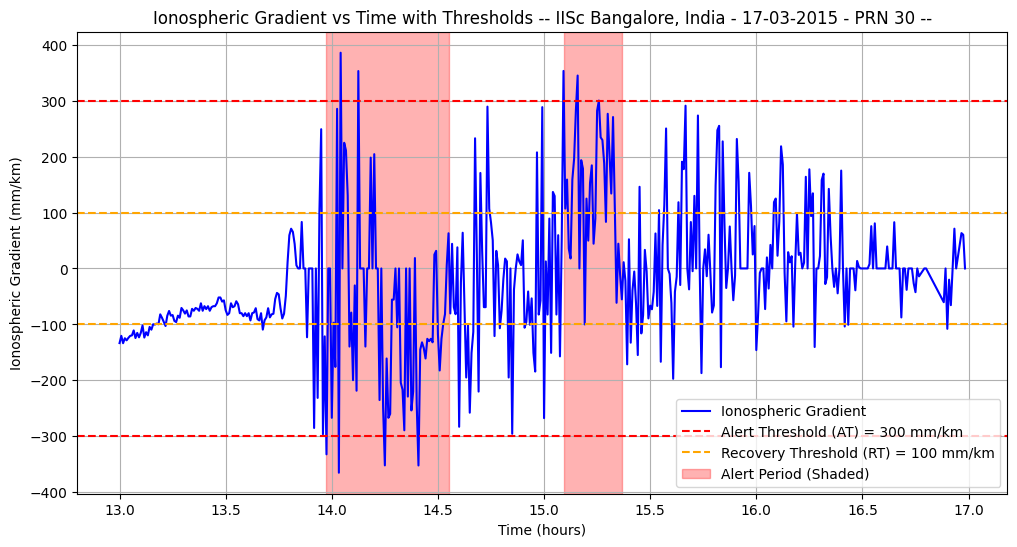

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_alert.csv")

prn_data = df[df["PRN"] == 30].copy()

prn_data["Time"] = pd.to_numeric(prn_data["Time"])

plt.figure(figsize=(12, 6))

plt.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label="Ionospheric Gradient", color="blue")

plt.axhline(y=AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
plt.axhline(y=RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")
plt.axhline(y=-AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
plt.axhline(y=-RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")

alert_intervals = []
current_alert_start = None

for i in range(len(prn_data)):
    status = prn_data.iloc[i]["Alert Status"]
    time = prn_data.iloc[i]["Time"]
    
    if "Alert" in status:
        if current_alert_start is None:
            current_alert_start = time
    else:
        if current_alert_start is not None:
            alert_intervals.append((current_alert_start, time))
            current_alert_start = None

if current_alert_start is not None:
    alert_intervals.append((current_alert_start, prn_data.iloc[-1]["Time"]))

for start, end in alert_intervals:
    plt.axvspan(start, end, alpha=0.3, color="red", label="Alert Period (Shaded)")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles)) 
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title("Ionospheric Gradient vs Time with Thresholds -- IISc Bangalore, India - 17-03-2015 - PRN 30 --")
plt.grid(True)
plt.show()


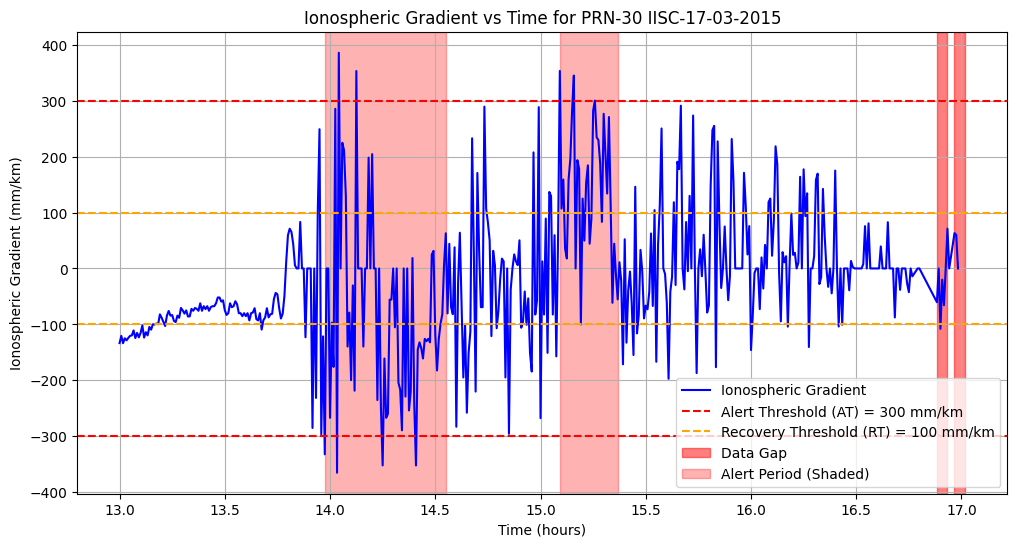

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_alert.csv")
prn_data = df[df["PRN"] == 30].copy()  
prn_data["Time"] = pd.to_numeric(prn_data["Time"])

plt.figure(figsize=(12, 6))

plt.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label="Ionospheric Gradient", color="blue")

plt.axhline(y=AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
plt.axhline(y=RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")
plt.axhline(y=-AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
plt.axhline(y=-RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")


alert_intervals = []
current_alert_start = None

for i in range(len(prn_data)):
    status = prn_data.iloc[i]["Alert Status"]
    time = prn_data.iloc[i]["Time"]
    
    if "Alert" in status:
        if current_alert_start is None:
            current_alert_start = time
    elif "DataGap" in status:
        plt.axvspan(time, time + 0.05, alpha=0.5, color="red", label="Data Gap") 
    else:
        if current_alert_start is not None:
            alert_intervals.append((current_alert_start, time))
            current_alert_start = None
if current_alert_start is not None:
    alert_intervals.append((current_alert_start, prn_data.iloc[-1]["Time"]))

for start, end in alert_intervals:
    plt.axvspan(start, end, alpha=0.3, color="red", label="Alert Period (Shaded)")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title("Ionospheric Gradient vs Time for PRN-30 IISC-17-03-2015")
plt.grid(True)
plt.show()


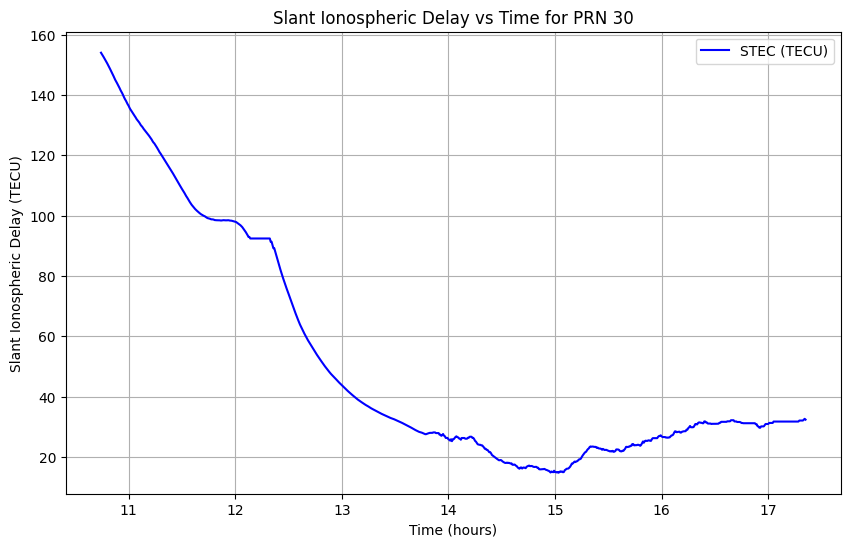

Plots generated for all PRNs.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "iisc-mar1715.csv"
data = pd.read_csv(file_path, usecols=["Time", "PRN", "Stec"]).dropna()

data["Delay (m)"] = data["Stec"] * 0.162  
prn_data = data[data["PRN"] == 30]

plt.figure(figsize=(10, 6))

plt.plot(prn_data["Time"], prn_data["Stec"], color="blue", label="STEC (TECU)")

plt.xlabel("Time (hours)")
plt.ylabel("Slant Ionospheric Delay (TECU)") 
plt.title(f"Slant Ionospheric Delay vs Time for PRN {30}")
plt.grid(True)
plt.legend()
plt.show()

print("Plots generated for all PRNs.")

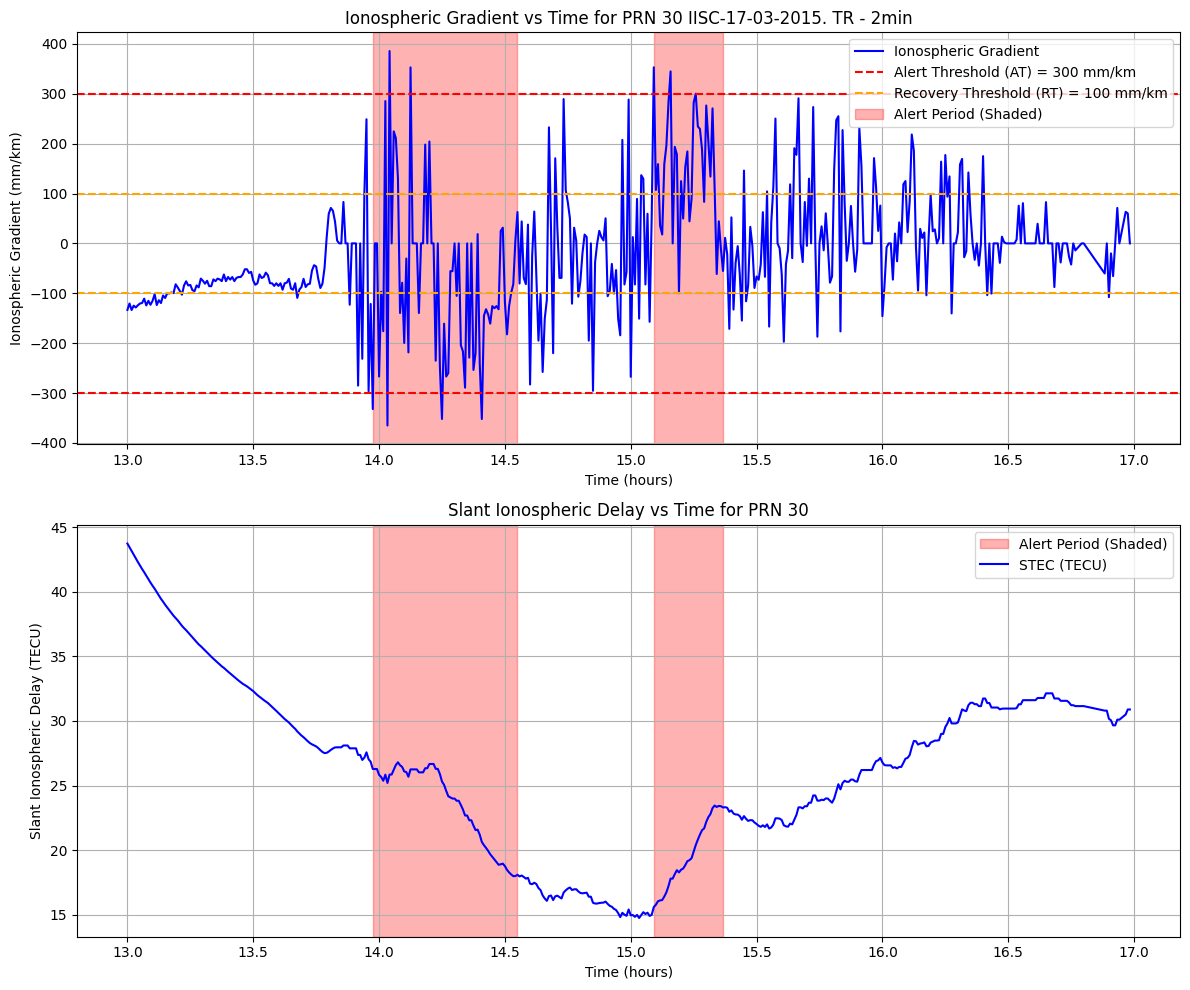

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_alert.csv")

prn_data = df[df["PRN"] == 30].copy()

prn_data["Time"] = pd.to_numeric(prn_data["Time"])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 10))

ax0.plot(prn_data["Time"], prn_data["Gradient (mm/km)"], label="Ionospheric Gradient", color="blue")

ax0.axhline(y=AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
ax0.axhline(y=RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")
ax0.axhline(y=-AT, color="red", linestyle="--", label=f"Alert Threshold (AT) = {AT} mm/km")
ax0.axhline(y=-RT, color="orange", linestyle="--", label=f"Recovery Threshold (RT) = {RT} mm/km")

alert_intervals = []
current_alert_start = None

for i in range(len(prn_data)):
    status = prn_data.iloc[i]["Alert Status"]
    time = prn_data.iloc[i]["Time"]
    
    if "Alert" in status:
        if current_alert_start is None:
            current_alert_start = time
    # elif "DataGap" in status:
    #     ax0.axvspan(time, time + 0.05, alpha=0.5, color="red", label="Data Gap")
    #     ax1.axvspan(time, time + 0.05, alpha=0.5, color="red", label="Data Gap") 
    else:
        if current_alert_start is not None:
            alert_intervals.append((current_alert_start, time))
            current_alert_start = None

if current_alert_start is not None:
    alert_intervals.append((current_alert_start, prn_data.iloc[-1]["Time"]))

for start, end in alert_intervals:
    ax0.axvspan(start, end, alpha=0.3, color="red", label="Alert Period (Shaded)")
    ax1.axvspan(start, end, alpha=0.3, color="red", label="Alert Period (Shaded)")

file_path = "processed_alert.csv"
data = pd.read_csv(file_path, usecols=["Time", "PRN", "Stec"])
data["Delay (m)"] = data["Stec"] * 0.162 

prn_data = data[data["PRN"] == 30]

ax1.plot(prn_data["Time"], prn_data["Stec"], color="blue", label="STEC (TECU)")
# ax1.plot(prn_data["Time"], prn_data["Delay (m)"], color="red", label="Delay (m)") 

ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Slant Ionospheric Delay (TECU)") 
ax1.set_title(f"Slant Ionospheric Delay vs Time for PRN {30}")
ax1.grid(True)
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles)) 
ax1.legend(by_label.values(), by_label.keys())

ax0.set_xlabel("Time (hours)")
ax0.set_ylabel("Ionospheric Gradient (mm/km)")
ax0.set_title("Ionospheric Gradient vs Time for PRN 30 IISC-17-03-2015. TR - 2min")
ax0.grid(True)

handles, labels = ax0.get_legend_handles_labels()
by_label = dict(zip(labels, handles)) 
ax0.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()


In [55]:
df[df['Recovery Timer'] != 0]

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km),Alert Status,Recovery Timer
71,13.591667,1.0,12.956,81.658,40.12,48930.0012,4.264155,Alert,30
73,13.608333,1.0,12.998,81.656,40.22,48989.9988,-77.001859,Alert,30
74,13.616667,1.0,13.019,81.655,39.99,49020.0012,-98.391283,Alert,60
75,13.625000,1.0,13.040,81.654,39.90,49050.0000,-38.500944,Alert,90
76,13.633333,1.0,13.061,81.653,39.90,49079.9988,0.000000,Normal,120
...,...,...,...,...,...,...,...,...,...
3681,15.291667,30.0,12.156,78.708,21.68,55050.0012,83.232661,Alert,30
3687,15.341667,30.0,12.061,78.724,23.34,55230.0012,-61.371557,Alert,30
3688,15.350000,30.0,12.045,78.727,23.42,55260.0000,44.228671,Alert,60
3689,15.358333,30.0,12.029,78.730,23.40,55289.9988,-11.057146,Alert,90


In [56]:
import numpy as np

def evaluate_alerting_performance(df, tolerance_windows=[300, 600, 900, 1200]):  
    valid_gradients = df[abs(df['Gradient (mm/km)']) > 0][['Time_seconds', 'Gradient (mm/km)']]
    
    alert_windows = []
    alert_start = None

    for index, row in df.iterrows():
        if row['Alert Status'] == "Alert" and alert_start is None:
            alert_start = row['Time_seconds']
        elif row['Alert Status'] == "Normal" and alert_start is not None:
            alert_windows.append((alert_start, row['Time_seconds']))
            alert_start = None

    scores = []

    for grad_time, _ in valid_gradients.itertuples(index=False):
        detected = False
        for tol in tolerance_windows:
            extended_alerts = [(start - tol, end) for start, end in alert_windows]

            if any(start <= grad_time <= end for start, end in extended_alerts):
                if tol == 300:   # 5 minutes
                    scores.append(100)
                elif tol == 600:  # 10 minutes
                    scores.append(50)
                elif tol == 900:  # 15 minutes
                    scores.append(20)
                elif tol == 1200: # 20 minutes
                    scores.append(5)
                detected = True
                break

        if not detected:
            scores.append(0)
    print(alert_windows)
    print(valid_gradients)
    return np.mean(scores) if scores else 0


In [57]:
# Example Usage
prn_performance_scores = evaluate_alerting_performance(df)
print(prn_performance_scores)

[(48899.9988, 49079.9988), (49320.0, 50069.9988), (58529.9988, 58920.0012), (59069.9988, 60210.00000000001), (60660.00000000001, 61110.00000000001), (61200.0, 46800.0), (49529.9988, 50339.9988), (52740.0, 53579.9988), (54810.0, 56279.9988), (58740.0012, 58860.00000000001), (58979.9988, 59789.9988), (55199.9988, 55800.0), (61020.0, 46800.0), (51059.9988, 52170.0012), (53820.0, 53939.9988), (59130.0, 60450.0012), (50310.0, 52380.0), (54330.0012, 55320.0012)]
      Time_seconds  Gradient (mm/km)
0       46800.0000       -104.141755
1       46829.9988        -59.509648
2       46860.0012        -85.545227
3       46890.0000        -92.984058
4       46919.9988        -74.387340
...            ...               ...
3864    60869.9988        -20.061033
3865    60900.0012        -65.634470
3867    60959.9988         71.091036
3869    61080.0012         63.159326
3870    61110.0000         60.208455

[2957 rows x 2 columns]
69.74974636455867


In [58]:
df.head()

,Time,PRN,Lat,Lon,Stec,Time_seconds,Gradient (mm/km),Alert Status,Recovery Timer
0,13.000000,1.0,11.377,81.819,64.03,46800.0000,-104.141755,Normal,0
1,13.008333,1.0,11.401,81.816,63.87,46829.9988,-59.509648,Normal,0
2,13.016667,1.0,11.425,81.813,63.64,46860.0012,-85.545227,Normal,0
3,13.025000,1.0,11.449,81.810,63.39,46890.0000,-92.984058,Normal,0
4,13.033333,1.0,11.473,81.807,63.19,46919.9988,-74.387340,Normal,0


C:\Users\srina\AppData\Local\Temp\ipykernel_12532\998305822.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file["Abs_Gradient"] = np.abs(filtered_file["Gradient (mm/km)"])


(24705, 8)


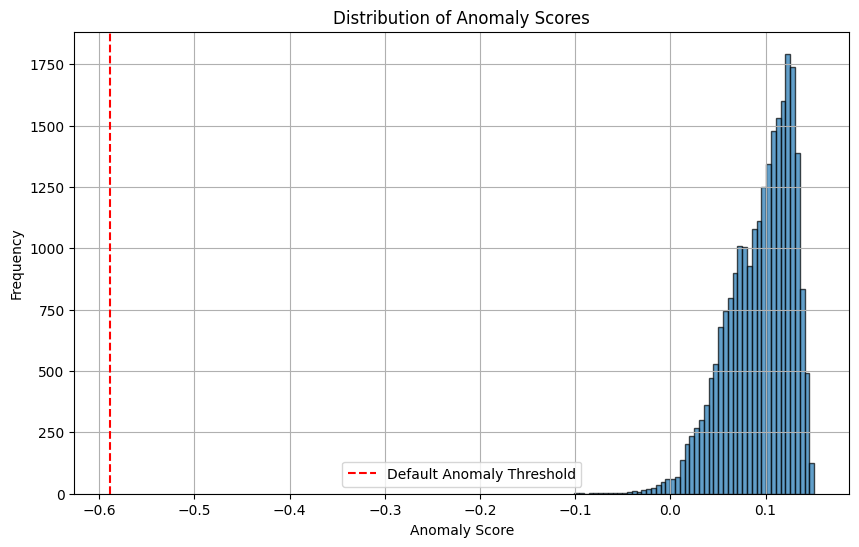

Total data points: 24705
Number of detected anomalies: 248
Default anomaly threshold (learned by model): -0.5890729131231116
            Time   PRN  Gradient (mm/km)  Abs_Gradient  anomaly_score
9468    0.016667  13.0      -1692.979529   1692.979529      -0.101091
14477   5.600000  19.0        969.519453    969.519453      -0.099951
14476   5.591667  19.0      -1220.108418   1220.108418      -0.097229
19123  21.516667  24.0      -3522.915942   3522.915942      -0.093958
19122  21.508333  24.0       2635.116597   2635.116597      -0.092573
19290   0.516667  25.0      -1627.258909   1627.258909      -0.091798
19289   0.508333  25.0        513.163717    513.163717      -0.083877
11402   1.558333  15.0        553.714901    553.714901      -0.077641
18567   2.916667  24.0      -1936.006802   1936.006802      -0.070929
18566   2.908333  24.0       1516.260279   1516.260279      -0.066263


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

EARTH_RADIUS = 6371
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return EARTH_RADIUS * c

file_path = "iisc-mar1715.csv"
columns = ["Time", "PRN", "Lat", "Lon", "Stec"]
data = pd.read_csv(file_path, usecols=columns)
data = data.replace(-99, np.nan).dropna()
data["Time_seconds"] = data["Time"] * 3600
data = data.sort_values(by=["PRN", "Time_seconds"])

gradients = []
for prn, group in data.groupby("PRN"):
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        t1, t2 = group.loc[i - 1, "Time_seconds"], group.loc[i, "Time_seconds"]
        dt = t2 - t1
        if dt <= 31 and dt >=29: 
            lat1, lon1 = group.loc[i - 1, ["Lat", "Lon"]]
            lat2, lon2 = group.loc[i, ["Lat", "Lon"]]
            d_ipp = haversine(lat1, lon1, lat2, lon2)

            stec1, stec2 = group.loc[i - 1, "Stec"], group.loc[i, "Stec"]
            gradient = (stec2 - stec1) / d_ipp if d_ipp > 0 else np.nan

            row = group.loc[i].to_dict()
            row["Gradient (mm/km)"] = gradient * 1000
            gradients.append(row)

gradient_df = pd.DataFrame(gradients)
gradient_df.dropna(subset=["Gradient (mm/km)"], inplace=True)
filtered_features = ['Lat', 'Lon', 'Gradient (mm/km)', 'Time', 'PRN']
filtered_file = gradient_df[filtered_features]
filtered_file["Abs_Gradient"] = np.abs(filtered_file["Gradient (mm/km)"])
filtered_file['Hour_sin'] = np.sin(2 * np.pi * filtered_file['Time'] / 24)
filtered_file['Hour_cos'] = np.cos(2 * np.pi * filtered_file['Time'] / 24)

print(filtered_file.shape)

features = ['Abs_Gradient', 'Lat', 'Lon', 'Hour_sin', 'Hour_cos']

feature_data = filtered_file[features].copy()

scaler = StandardScaler()
feature_data_scaled = scaler.fit_transform(feature_data)
feature_data_scaled_df = pd.DataFrame(feature_data_scaled, columns=features)

contamination_rate = 0.01
model = IsolationForest(contamination=contamination_rate, random_state=42)
model.fit(feature_data_scaled_df)

filtered_file['anomaly_score'] = model.decision_function(feature_data_scaled_df)
filtered_file['anomaly_label'] = model.predict(feature_data_scaled_df)

plt.figure(figsize=(10, 6))
plt.hist(filtered_file['anomaly_score'], bins=50, edgecolor='k', alpha=0.7)
plt.axvline(x=model.offset_, color='r', linestyle='--', label='Default Anomaly Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.grid(True)
plt.show()

alert_data = filtered_file[filtered_file['anomaly_label'] == -1].copy()

print(f"Total data points: {len(filtered_file)}")
print(f"Number of detected anomalies: {len(alert_data)}")
print(f"Default anomaly threshold (learned by model): {model.offset_}")

print(alert_data.sort_values(by='anomaly_score').head(10)[['Time', 'PRN', 'Gradient (mm/km)', 'Abs_Gradient', 'anomaly_score']])


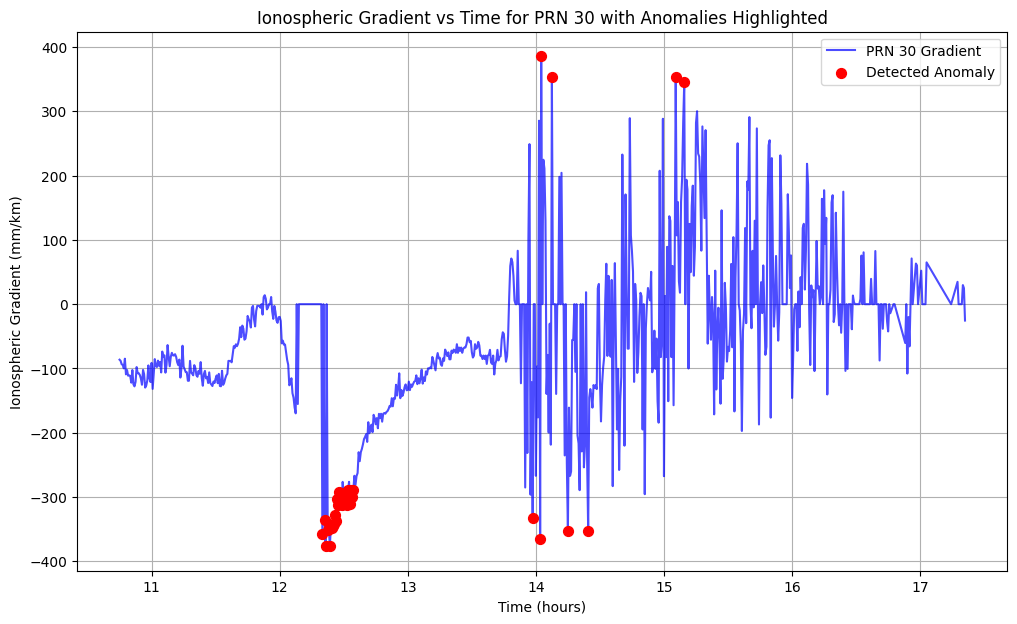

In [60]:
prn_chosen = 30
filtered_prn_data = filtered_file[filtered_file['PRN'] == prn_chosen]
anomaly_points_of_chosen_prn = filtered_prn_data[filtered_prn_data.index.isin(alert_data.index)]

plt.figure(figsize=(12, 7))

plt.plot(filtered_prn_data["Time"], filtered_prn_data["Gradient (mm/km)"],
         label=f"PRN {prn_chosen} Gradient", color='blue', alpha=0.7)

plt.scatter(anomaly_points_of_chosen_prn["Time"], anomaly_points_of_chosen_prn["Gradient (mm/km)"],
            color='red', s=50, zorder=5, label='Detected Anomaly')

plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title(f"Ionospheric Gradient vs Time for PRN {prn_chosen} with Anomalies Highlighted")
plt.grid(True)
plt.legend()
plt.show()


In [61]:
df = filtered_file.copy()
df["Time_seconds"] = df["Time"] * 3600
df["Alert Status"] = "Normal"
df["Recovery Timer"] = 0

TR = 300     
TIME_STEP = 30          

THRESHOLD = df["anomaly_score"].quantile(0.2)
print(THRESHOLD)

prns = df["PRN"].unique()

for prn in prns:
    prn_data = df[df["PRN"] == prn].copy()
    in_alert = False
    recovery_timer = 0

    for i in range(len(prn_data)):
        current_row = prn_data.iloc[i]
        current_index = current_row.name
        if i > 0:
            time_diff = current_row["Time_seconds"] - prn_data.iloc[i - 1]["Time_seconds"]
            if time_diff > 90:
                df.at[current_index, "Alert Status"] = "DataGap"
                in_alert = False
                recovery_timer = 0
                continue

        score = current_row["anomaly_score"]
        anomaly_label = current_row["anomaly_label"]

        if anomaly_label == -1:
            df.at[current_index, "Alert Status"] = "Alert"
            in_alert = True
            recovery_timer = 0
        elif in_alert:
            if score >= THRESHOLD:
                recovery_timer += TIME_STEP
                df.at[current_index, "Recovery Timer"] = recovery_timer
                if recovery_timer >= TR:
                    df.at[current_index, "Alert Status"] = "Normal"
                    in_alert = False
                    recovery_timer = 0
                else:
                    df.at[current_index, "Alert Status"] = "Alert"
            else:
                recovery_timer = 0
                df.at[current_index, "Alert Status"] = "Alert"
        else:
            df.at[current_index, "Alert Status"] = "Normal"


0.06430633715121468


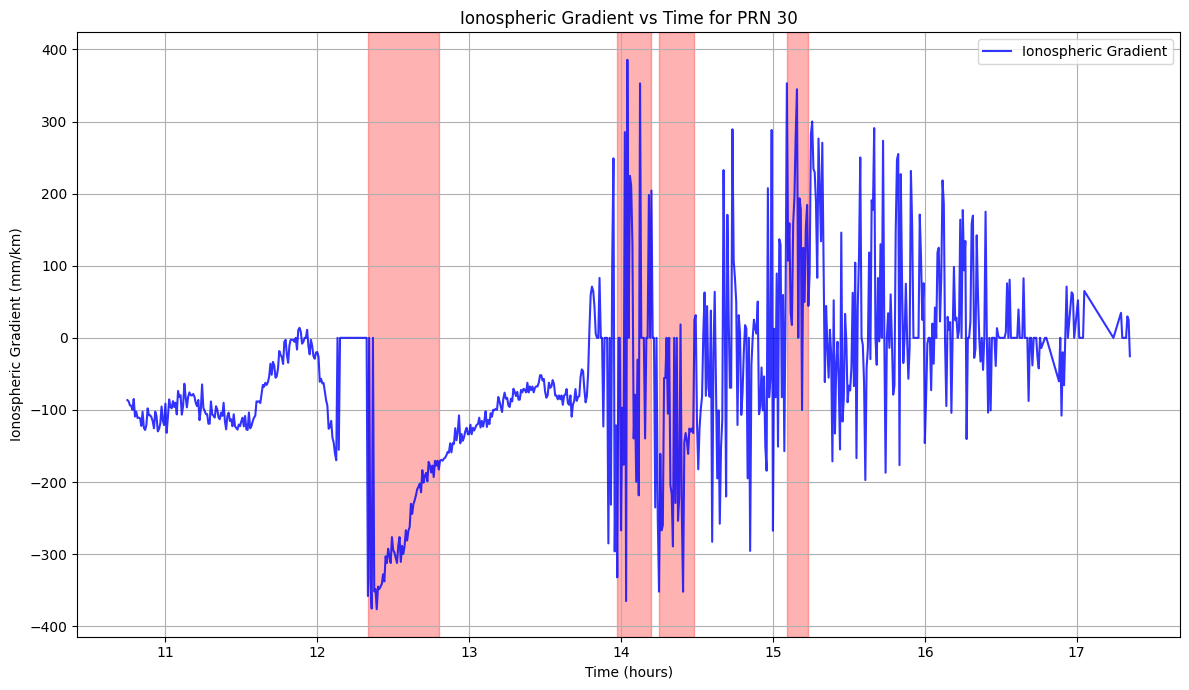

In [62]:
import matplotlib.pyplot as plt

prn_chosen = 30
filtered_prn_data = df[df["PRN"] == prn_chosen]

plt.figure(figsize=(12, 7))

plt.plot(filtered_prn_data["Time"], filtered_prn_data["Gradient (mm/km)"],
         label="Ionospheric Gradient", color='blue', alpha=0.8)

alert_df = filtered_prn_data[filtered_prn_data["Alert Status"] == "Alert"]
if not alert_df.empty:
    alert_df = alert_df.sort_values("Time")
    alert_df["Time_diff"] = alert_df["Time"].diff()
    alert_df["Group"] = (alert_df["Time_diff"] > (1 / 60)).cumsum()

    for _, group in alert_df.groupby("Group"):
        start_time = group["Time"].iloc[0]
        end_time = group["Time"].iloc[-1]
        if start_time != end_time:
            plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        else:
            plt.axvline(start_time, color='red', alpha=0.3)

plt.title(f"Ionospheric Gradient vs Time for PRN {prn_chosen}")
plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\srina\AppData\Local\Temp\ipykernel_12532\1322708696.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file["Abs_Gradient"] = np.abs(filtered_file["Gradient (mm/km)"])


(24705, 8)


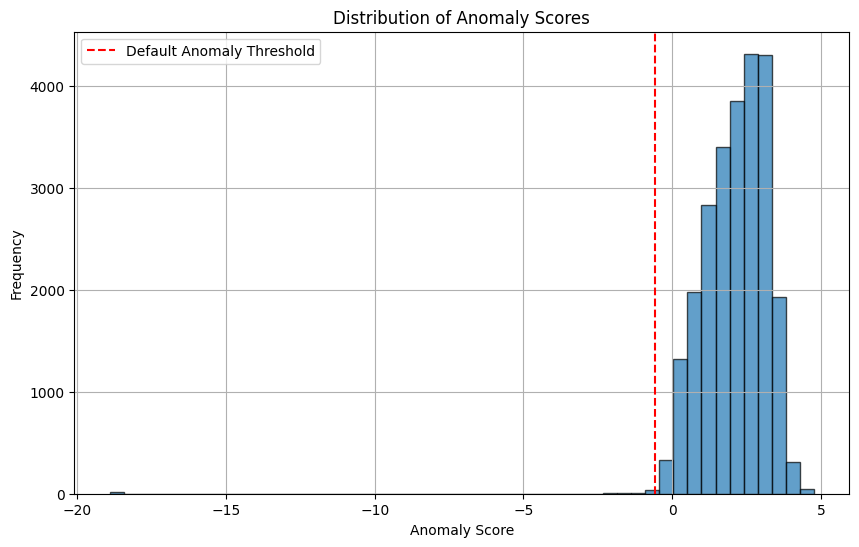

Total data points: 24705
Number of detected anomalies: 258
Default anomaly threshold (learned by model): -0.5890729131231116
            Time   PRN  Gradient (mm/km)  Abs_Gradient  anomaly_score
19123  21.516667  24.0      -3522.915942   3522.915942     -18.911707
19122  21.508333  24.0       2635.116597   2635.116597     -18.911703
19290   0.516667  25.0      -1627.258909   1627.258909     -18.887157
19409   5.358333  25.0       2225.234908   2225.234908     -18.885793
19410   5.366667  25.0       1002.499550   1002.499550     -18.864716
14476   5.591667  19.0      -1220.108418   1220.108418     -18.825505
18567   2.916667  24.0      -1936.006802   1936.006802     -18.813264
18566   2.908333  24.0       1516.260279   1516.260279     -18.677418
2927    9.100000   4.0       -944.510593    944.510593     -18.668138
14477   5.600000  19.0        969.519453    969.519453     -18.651646


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

EARTH_RADIUS = 6371
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return EARTH_RADIUS * c

file_path = "iisc-mar1715.csv"
columns = ["Time", "PRN", "Lat", "Lon", "Stec"]
data = pd.read_csv(file_path, usecols=columns)
data = data.replace(-99, np.nan).dropna()
data["Time_seconds"] = data["Time"] * 3600
data = data.sort_values(by=["PRN", "Time_seconds"])

gradients = []
for prn, group in data.groupby("PRN"):
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        t1, t2 = group.loc[i - 1, "Time_seconds"], group.loc[i, "Time_seconds"]
        dt = t2 - t1
        if dt <= 31 and dt >=29: 
            lat1, lon1 = group.loc[i - 1, ["Lat", "Lon"]]
            lat2, lon2 = group.loc[i, ["Lat", "Lon"]]
            d_ipp = haversine(lat1, lon1, lat2, lon2)

            stec1, stec2 = group.loc[i - 1, "Stec"], group.loc[i, "Stec"]
            gradient = (stec2 - stec1) / d_ipp if d_ipp > 0 else np.nan

            row = group.loc[i].to_dict()
            row["Gradient (mm/km)"] = gradient * 1000
            gradients.append(row)

gradient_df = pd.DataFrame(gradients)
gradient_df.dropna(subset=["Gradient (mm/km)"], inplace=True)
filtered_features = ['Lat', 'Lon', 'Gradient (mm/km)', 'Time', 'PRN']
filtered_file = gradient_df[filtered_features]
filtered_file["Abs_Gradient"] = np.abs(filtered_file["Gradient (mm/km)"])
filtered_file['Hour_sin'] = np.sin(2 * np.pi * filtered_file['Time'] / 24)
filtered_file['Hour_cos'] = np.cos(2 * np.pi * filtered_file['Time'] / 24)

print(filtered_file.shape)

features = ['Abs_Gradient', 'Lat', 'Lon', 'Hour_sin', 'Hour_cos']

feature_data = filtered_file[features].copy()

scaler = StandardScaler()
feature_data_scaled = scaler.fit_transform(feature_data)
feature_data_scaled_df = pd.DataFrame(feature_data_scaled, columns=features)

contamination_rate = 0.01
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=contamination_rate, gamma='scale')
ocsvm.fit(feature_data_scaled_df)
filtered_file['anomaly_label'] = ocsvm.predict(feature_data_scaled_df)
filtered_file['anomaly_score'] = ocsvm.decision_function(feature_data_scaled_df)


plt.figure(figsize=(10, 6))
plt.hist(filtered_file['anomaly_score'], bins=50, edgecolor='k', alpha=0.7)
plt.axvline(x=model.offset_, color='r', linestyle='--', label='Default Anomaly Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.grid(True)
plt.show()

alert_data = filtered_file[filtered_file['anomaly_label'] == -1].copy()

print(f"Total data points: {len(filtered_file)}")
print(f"Number of detected anomalies: {len(alert_data)}")
print(f"Default anomaly threshold (learned by model): {model.offset_}")

print(alert_data.sort_values(by='anomaly_score').head(10)[['Time', 'PRN', 'Gradient (mm/km)', 'Abs_Gradient', 'anomaly_score']])


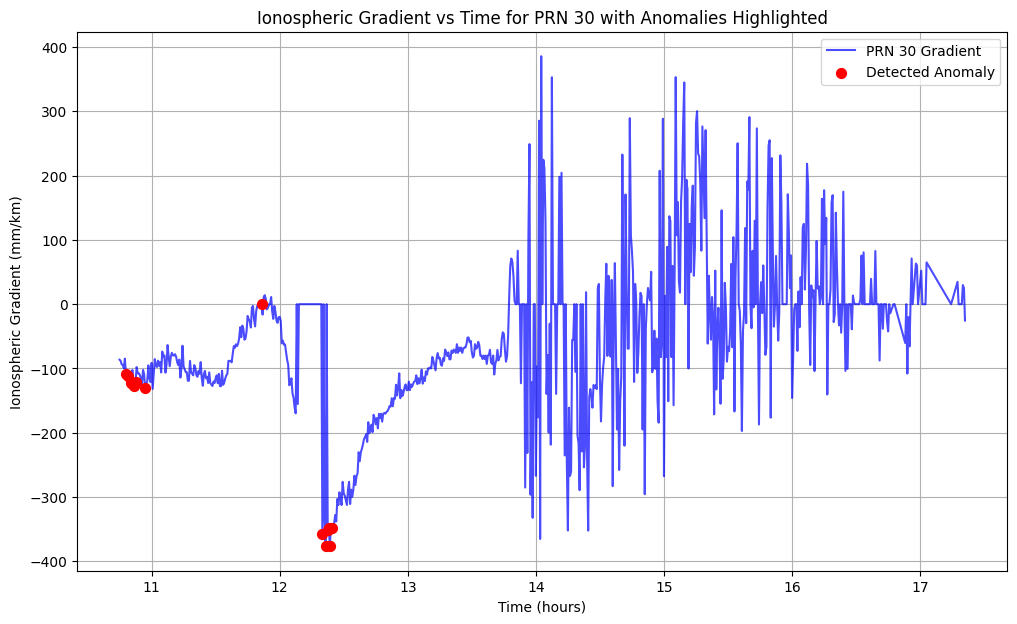

In [77]:
prn_chosen = 30
filtered_prn_data = filtered_file[filtered_file['PRN'] == prn_chosen]
anomaly_points_of_chosen_prn = filtered_prn_data[filtered_prn_data.index.isin(alert_data.index)]

plt.figure(figsize=(12, 7))

plt.plot(filtered_prn_data["Time"], filtered_prn_data["Gradient (mm/km)"],
         label=f"PRN {prn_chosen} Gradient", color='blue', alpha=0.7)

plt.scatter(anomaly_points_of_chosen_prn["Time"], anomaly_points_of_chosen_prn["Gradient (mm/km)"],
            color='red', s=50, zorder=5, label='Detected Anomaly')

plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.title(f"Ionospheric Gradient vs Time for PRN {prn_chosen} with Anomalies Highlighted")
plt.grid(True)
plt.legend()
plt.show()


In [65]:
df = filtered_file.copy()
df["Time_seconds"] = df["Time"] * 3600
df["Alert Status"] = "Normal"
df["Recovery Timer"] = 0

TR = 300     
TIME_STEP = 30          

THRESHOLD = df["anomaly_score"].quantile(0.2)
print(THRESHOLD)

prns = df["PRN"].unique()

for prn in prns:
    prn_data = df[df["PRN"] == prn].copy()
    in_alert = False
    recovery_timer = 0

    for i in range(len(prn_data)):
        current_row = prn_data.iloc[i]
        current_index = current_row.name
        if i > 0:
            time_diff = current_row["Time_seconds"] - prn_data.iloc[i - 1]["Time_seconds"]
            if time_diff > 90:
                df.at[current_index, "Alert Status"] = "DataGap"
                in_alert = False
                recovery_timer = 0
                continue

        score = current_row["anomaly_score"]
        anomaly_label = current_row["anomaly_label"]

        if anomaly_label == -1:
            df.at[current_index, "Alert Status"] = "Alert"
            in_alert = True
            recovery_timer = 0
        elif in_alert:
            if score >= THRESHOLD:
                recovery_timer += TIME_STEP
                df.at[current_index, "Recovery Timer"] = recovery_timer
                if recovery_timer >= TR:
                    df.at[current_index, "Alert Status"] = "Normal"
                    in_alert = False
                    recovery_timer = 0
                else:
                    df.at[current_index, "Alert Status"] = "Alert"
            else:
                recovery_timer = 0
                df.at[current_index, "Alert Status"] = "Alert"
        else:
            df.at[current_index, "Alert Status"] = "Normal"


1.2035374572097588


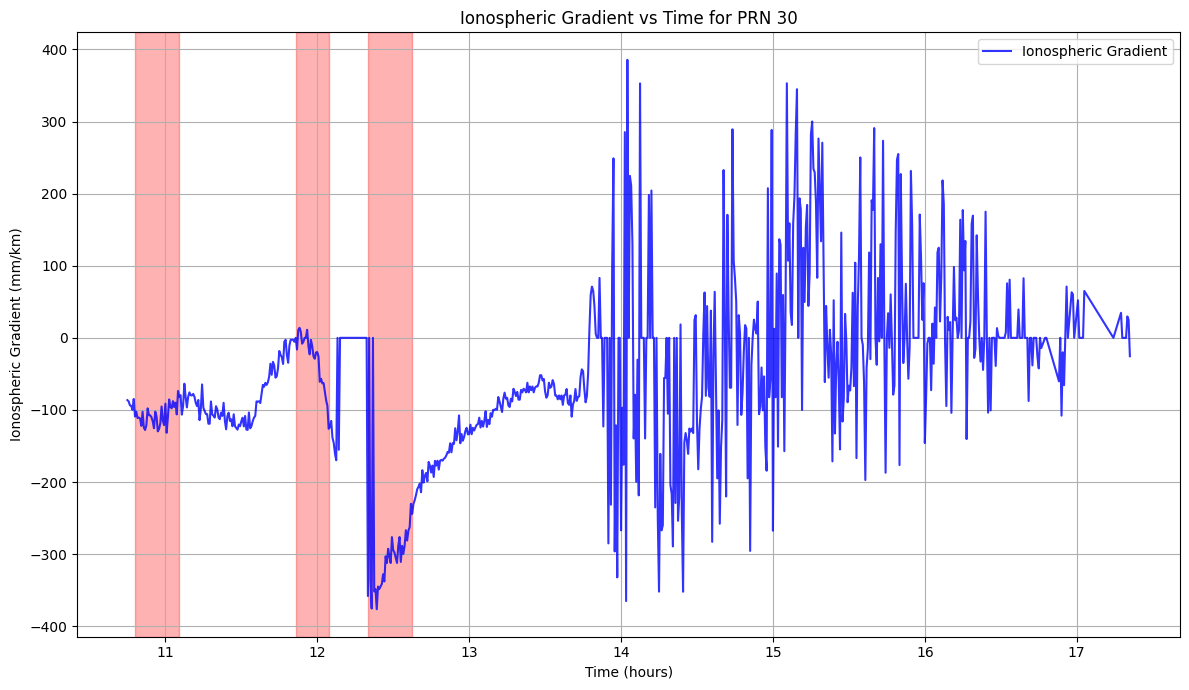

In [66]:
import matplotlib.pyplot as plt

prn_chosen = 30
filtered_prn_data = df[df["PRN"] == prn_chosen]

plt.figure(figsize=(12, 7))

plt.plot(filtered_prn_data["Time"], filtered_prn_data["Gradient (mm/km)"],
         label="Ionospheric Gradient", color='blue', alpha=0.8)

alert_df = filtered_prn_data[filtered_prn_data["Alert Status"] == "Alert"]
if not alert_df.empty:
    alert_df = alert_df.sort_values("Time")
    alert_df["Time_diff"] = alert_df["Time"].diff()
    alert_df["Group"] = (alert_df["Time_diff"] > (1 / 60)).cumsum()

    for _, group in alert_df.groupby("Group"):
        start_time = group["Time"].iloc[0]
        end_time = group["Time"].iloc[-1]
        if start_time != end_time:
            plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        else:
            plt.axvline(start_time, color='red', alpha=0.3)

plt.title(f"Ionospheric Gradient vs Time for PRN {prn_chosen}")
plt.xlabel("Time (hours)")
plt.ylabel("Ionospheric Gradient (mm/km)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
